___
# Ciência dos Dados - PROJETO 1

## Gustavo Molina Freneda Benites


## O que influencia na idade de inicio de trabalho das crianças de 5-17 anos?

___
## Introdução

A partir da manipulação dos dados fornecidos, meu projeto visa mostrar como é a distribuição de crianças entre 5-17 anos que trabalham no Brasil(dividido por região:Norte,Sul,Sudeste,Norte e Nordeste) assim como mostrar a relação do trabalho infantil com a escolaridade das mesmas:publica ou privada, tentando então, provar que crianças de escola publica tendem a procurar mais por empregos do que crianças de escola privada.
Analisar em função da renda, horas de trabalho e escolaridade como os mesmos influenciam no trabalho das pessoas no Brasil


___
## Filtros da base de dados

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange


In [17]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gustavo\Desktop\insper\cd new


In [18]:
#Se usar o arquivo descompactado
info = pd.read_csv('PES2015.csv',sep=',')
pd.options.mode.chained_assignment = None 
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


In [19]:
infoM = pd.DataFrame({
    'regioes' : info.UF,
    'começou_trabalhar' : info.V9891,
    'rede_de_ensino' : info.V6002,
    'renda' : info.V4750,
    'anos_de_estudo' : info.V4803
})


# Filtros 1

In [20]:
pd.to_numeric(infoM.regioes)
infoM.regioes[(infoM.regioes>=11) & (infoM.regioes<=17)] = [1]
infoM.regioes[(infoM.regioes>=21) & (infoM.regioes<=29)] = [2]
infoM.regioes[(infoM.regioes>=31) & (infoM.regioes<=35)] = [3]
infoM.regioes[(infoM.regioes>=41) & (infoM.regioes<=43)] = [4]
infoM.regioes[(infoM.regioes>=50) & (infoM.regioes<=53)] = [5]

infoM = infoM[infoM.começou_trabalhar<=3]

def quantidade(linha):
    if linha==1:
        return '5-9 anos'
    if linha==2:
        return '10-14 anos'
    if linha==3:
        return '15-17 anos'
    
infoM.começou_trabalhar=infoM.começou_trabalhar.apply(quantidade)

infoM.regioes = infoM.regioes.astype('category')
infoM.regioes.cat.categories = ('Norte','Nordeste','Sudeste','Sul','Centro-Oeste')


# Região do Brasil x Faixa de idade que começou a trabalhar

A partir do grafico e da tabela mostrados nessa seção, gotaria de demonstrar como há uma discrepancia em relação ao trablaho infantil em cada região: visualmente é nitido que em algumas regiões esse tipo de ação é mais frequente, sendo eles no Nordeste e no Sudeste.
http://noticias.r7.com/economia/noticias/criancas-do-pe-deixam-de-ir-a-escola-para-trabalhar-na-cata-de-mariscos-20101009.html

Text(0,0.5,'Porcentagem das pessoasa \nque trabalham na faixa etaria')

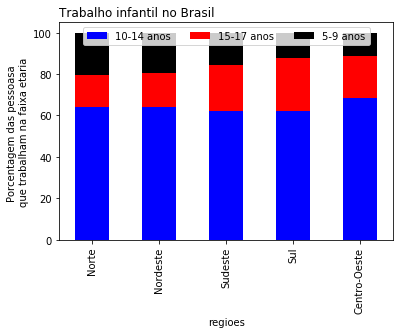

In [58]:

cross1 = pd.crosstab([infoM.regioes],[infoM.começou_trabalhar], normalize = "index")*100
cross1.dropna()




#s1 = cross1.sum()
#cross1*100/s1
#cross1 = (cross1/cross1.sum().sum()*100).round(decimals=5)
cross1.plot(kind = 'bar',stacked=True, color = ('blue','red','black'))
cross1.dropna()
plt.title('Trabalho infantil no Brasil',loc = 'left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=3,fancybox=True, shadow=False)
plt.ylabel('Porcentagem das pessoasa \nque trabalham na faixa etaria')


# Filtros 2

In [22]:
infoM = infoM[(infoM.rede_de_ensino==2) | (infoM.rede_de_ensino==4)]

def rede(linha):
    if linha==2:
        return 'rede publica'
    if linha==4:
        return 'rede privada'
infoM.rede_de_ensino=infoM.rede_de_ensino.apply(rede)
    
#infoM.rede_de_ensino.dropna()


# Faixa de idade em que começou a trabalhar x Rede de ensino frequentada 

Com o grafico gerado gostaria de analisar se a rede de ensino influenciaria na idade em que o cidadão começa a trablhar, sendo entao nitido que: Sim, a rede de ensino influencia e muito, no grafico podemos ver que as crianças que trabalham e estudam em escola publica são praticamente o dobro ou ate mesmo o triplo das que trabalham e estudam em rede de ensino privado.

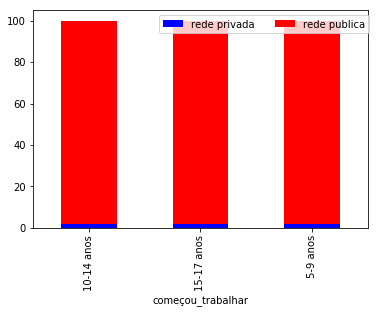

In [33]:
dr = pd.crosstab([infoM.começou_trabalhar],[infoM.rede_de_ensino],normalize = "index")*100
dr


dr.plot(kind = 'bar',stacked = True, color = ('blue','red'))
plt.legend(loc='upper center', bbox_to_anchor=(0.69, 1.00), ncol=3,fancybox=True, shadow=False)



# Filtro 3

In [38]:
infoM = infoM[infoM.renda<=6500]
x = infoM.renda

media = 3933/1958**(1/2)
print(media)
faixa=np.arange(0,3933.0,89)

88.88277448185009


# Começou a trabalhar x Renda

A partir das informações geradas, pretendo demosntrar como a renda familiar per capita de um cidadão influencia diretamente na idade em que o mesmo começaria a trablhar, sendo estabelecido um teto salarial de 6500 reais e idade de trabalho de 5-18 anos de idade 

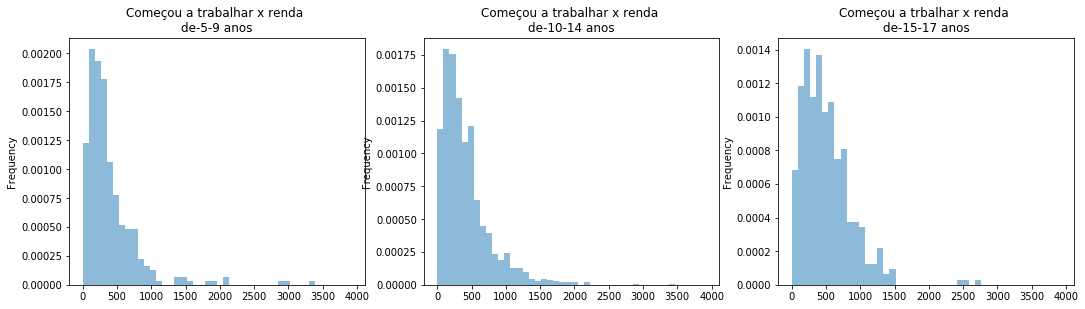

In [57]:
dr2 = pd.crosstab([infoM.começou_trabalhar],[infoM.renda])
plt.subplot(231)
pt1 = infoM.renda[infoM.começou_trabalhar=='5-9 anos'].plot.hist(bins=faixa,title='Começou a trabalhar x renda \nde-5-9 anos',normed=1,alpha=0.5,figsize = (14,10) )
plt.subplot(232)
pt2 = infoM.renda[infoM.começou_trabalhar=='10-14 anos'].plot.hist(bins=faixa,title='Começou a trabalhar x renda \nde-10-14 anos',normed=1,alpha=0.5,figsize = (16,10))
plt.subplot(233)
pt3 = infoM.renda[infoM.começou_trabalhar=='15-17 anos'].plot.hist(bins=faixa,title='Começou a trbalhar x renda \nde-15-17 anos',normed=1,alpha=0.5,figsize = (18,10))

# Filtro 4 

In [26]:
infoM = infoM[infoM.anos_de_estudo<=7]

def anos(linha):
    if linha==1:
        return 'sem instrução'
    if linha==2:
        return '1 ano'
    if linha==3:
        return '2 anos'
    if linha==4:
        return '3 anos'
    if linha==5:
        return '4 anos'
    if linha==6:
        return '5 anos'
    if linha==7:
        return '6 anos'
    
    
infoM.anos_de_estudo=infoM.anos_de_estudo.apply(anos)


# Idade em que começou a trabalhar x anos de escolaridade

A partir do grafico gerado, é desejado que o observador consiga analisar e deduzir um fato que seria o de que crianças que começam a trablhar mais cedo tendem a ir menos as escolas

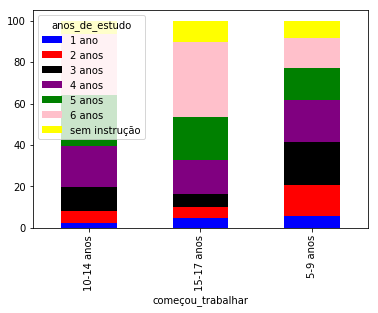

In [32]:
dr3 = pd.crosstab([infoM.começou_trabalhar],[infoM.anos_de_estudo],normalize = "index")*100

dr3.plot(kind = 'bar', stacked = True,color = ('blue','red','black','purple','green','pink','yellow'))


# Tabela de analise geral dos dados

In [28]:
infoM.head()

,anos_de_estudo,começou_trabalhar,rede_de_ensino,regioes,renda
53,5 anos,10-14 anos,rede publica,Norte,700.0
153,5 anos,15-17 anos,rede publica,Norte,300.0
181,3 anos,10-14 anos,rede publica,Norte,425.0
242,3 anos,10-14 anos,rede publica,Norte,409.0
361,4 anos,10-14 anos,rede publica,Norte,241.0


In [29]:
#Fazer grafico de renda em relação idade em que começou a trabalhar + grafico de pizza anos de estudo em relação a idade em que começou a 
#trabalhar
#tabela de Dados gerais

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!